In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/heart_2020_cleaned_binary.csv')

In [3]:
df.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,0,0,16.60,1,0,0,3.0,30.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,20.34,0,0,1,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,0,26.58,1,0,0,20.0,30.0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,3,0,24.21,0,0,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,4,0,23.71,0,0,0,28.0,0.0,1,0,...,0,0,0,0,1,0,0,0,0,1


([<matplotlib.patches.Wedge at 0x15ed6fad970>,
 [Text(6.735557395310444e-17, 1.1, 'Has Heart Disease'),
  Text(-2.0206672185931328e-16, -1.1, 'Does Not Have Heart Disease')])

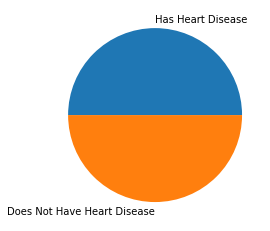

In [4]:
keepThese = ['DiffWalking', 'PhysicalHealth', 'Diabetic_Yes', 'Stroke', 'Poor_Health', 'Fair_Health', '80 or older', 'Smoking', 'KidneyDisease']

X = df[keepThese]
Y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Balancing the data
balancer = RandomUnderSampler()
X_train, y_train = balancer.fit_resample(X_train, y_train)

# Scaling the data for better behavior with models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

heart_labels = ['Has Heart Disease', 'Does Not Have Heart Disease']
plt.pie([len(df['HeartDisease'] == 1), len(df['HeartDisease'] == 0)], labels = heart_labels)

In [5]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

print(f"Logistic Regression Mean Accuracy: {log_reg_score}")

Logistic Regression Mean Accuracy: 0.765137775331774


In [6]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

print(f"KNN Mean Accuracy: {knn_score}")

KNN Mean Accuracy: 0.8971219152209533


Decision Tree Mean Accuracy: 0.7459630514452964


[Text(0.5, 0.9166666666666666, 'DiffWalking <= 0.606\ngini = 0.5\nsamples = 40856\nvalue = [20428, 20428]\nclass = No HD'),
 Text(0.25, 0.75, 'Diabetic_Yes <= 0.676\ngini = 0.486\nsamples = 31012\nvalue = [18079, 12933]\nclass = No HD'),
 Text(0.125, 0.5833333333333334, '80 or older <= 1.084\ngini = 0.463\nsamples = 25940\nvalue = [16476, 9464]\nclass = No HD'),
 Text(0.0625, 0.4166666666666667, 'Stroke <= 1.403\ngini = 0.442\nsamples = 23344\nvalue = [15648, 7696]\nclass = No HD'),
 Text(0.03125, 0.25, 'Smoking <= 0.02\ngini = 0.428\nsamples = 22380\nvalue = [15423, 6957]\nclass = No HD'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.364\nsamples = 12854\nvalue = [9774, 3080]\nclass = No HD'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.483\nsamples = 9526\nvalue = [5649, 3877]\nclass = No HD'),
 Text(0.09375, 0.25, 'Fair_Health <= 0.847\ngini = 0.358\nsamples = 964\nvalue = [225, 739]\nclass = Yes HD'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.381\nsamples = 738\nvalue = [

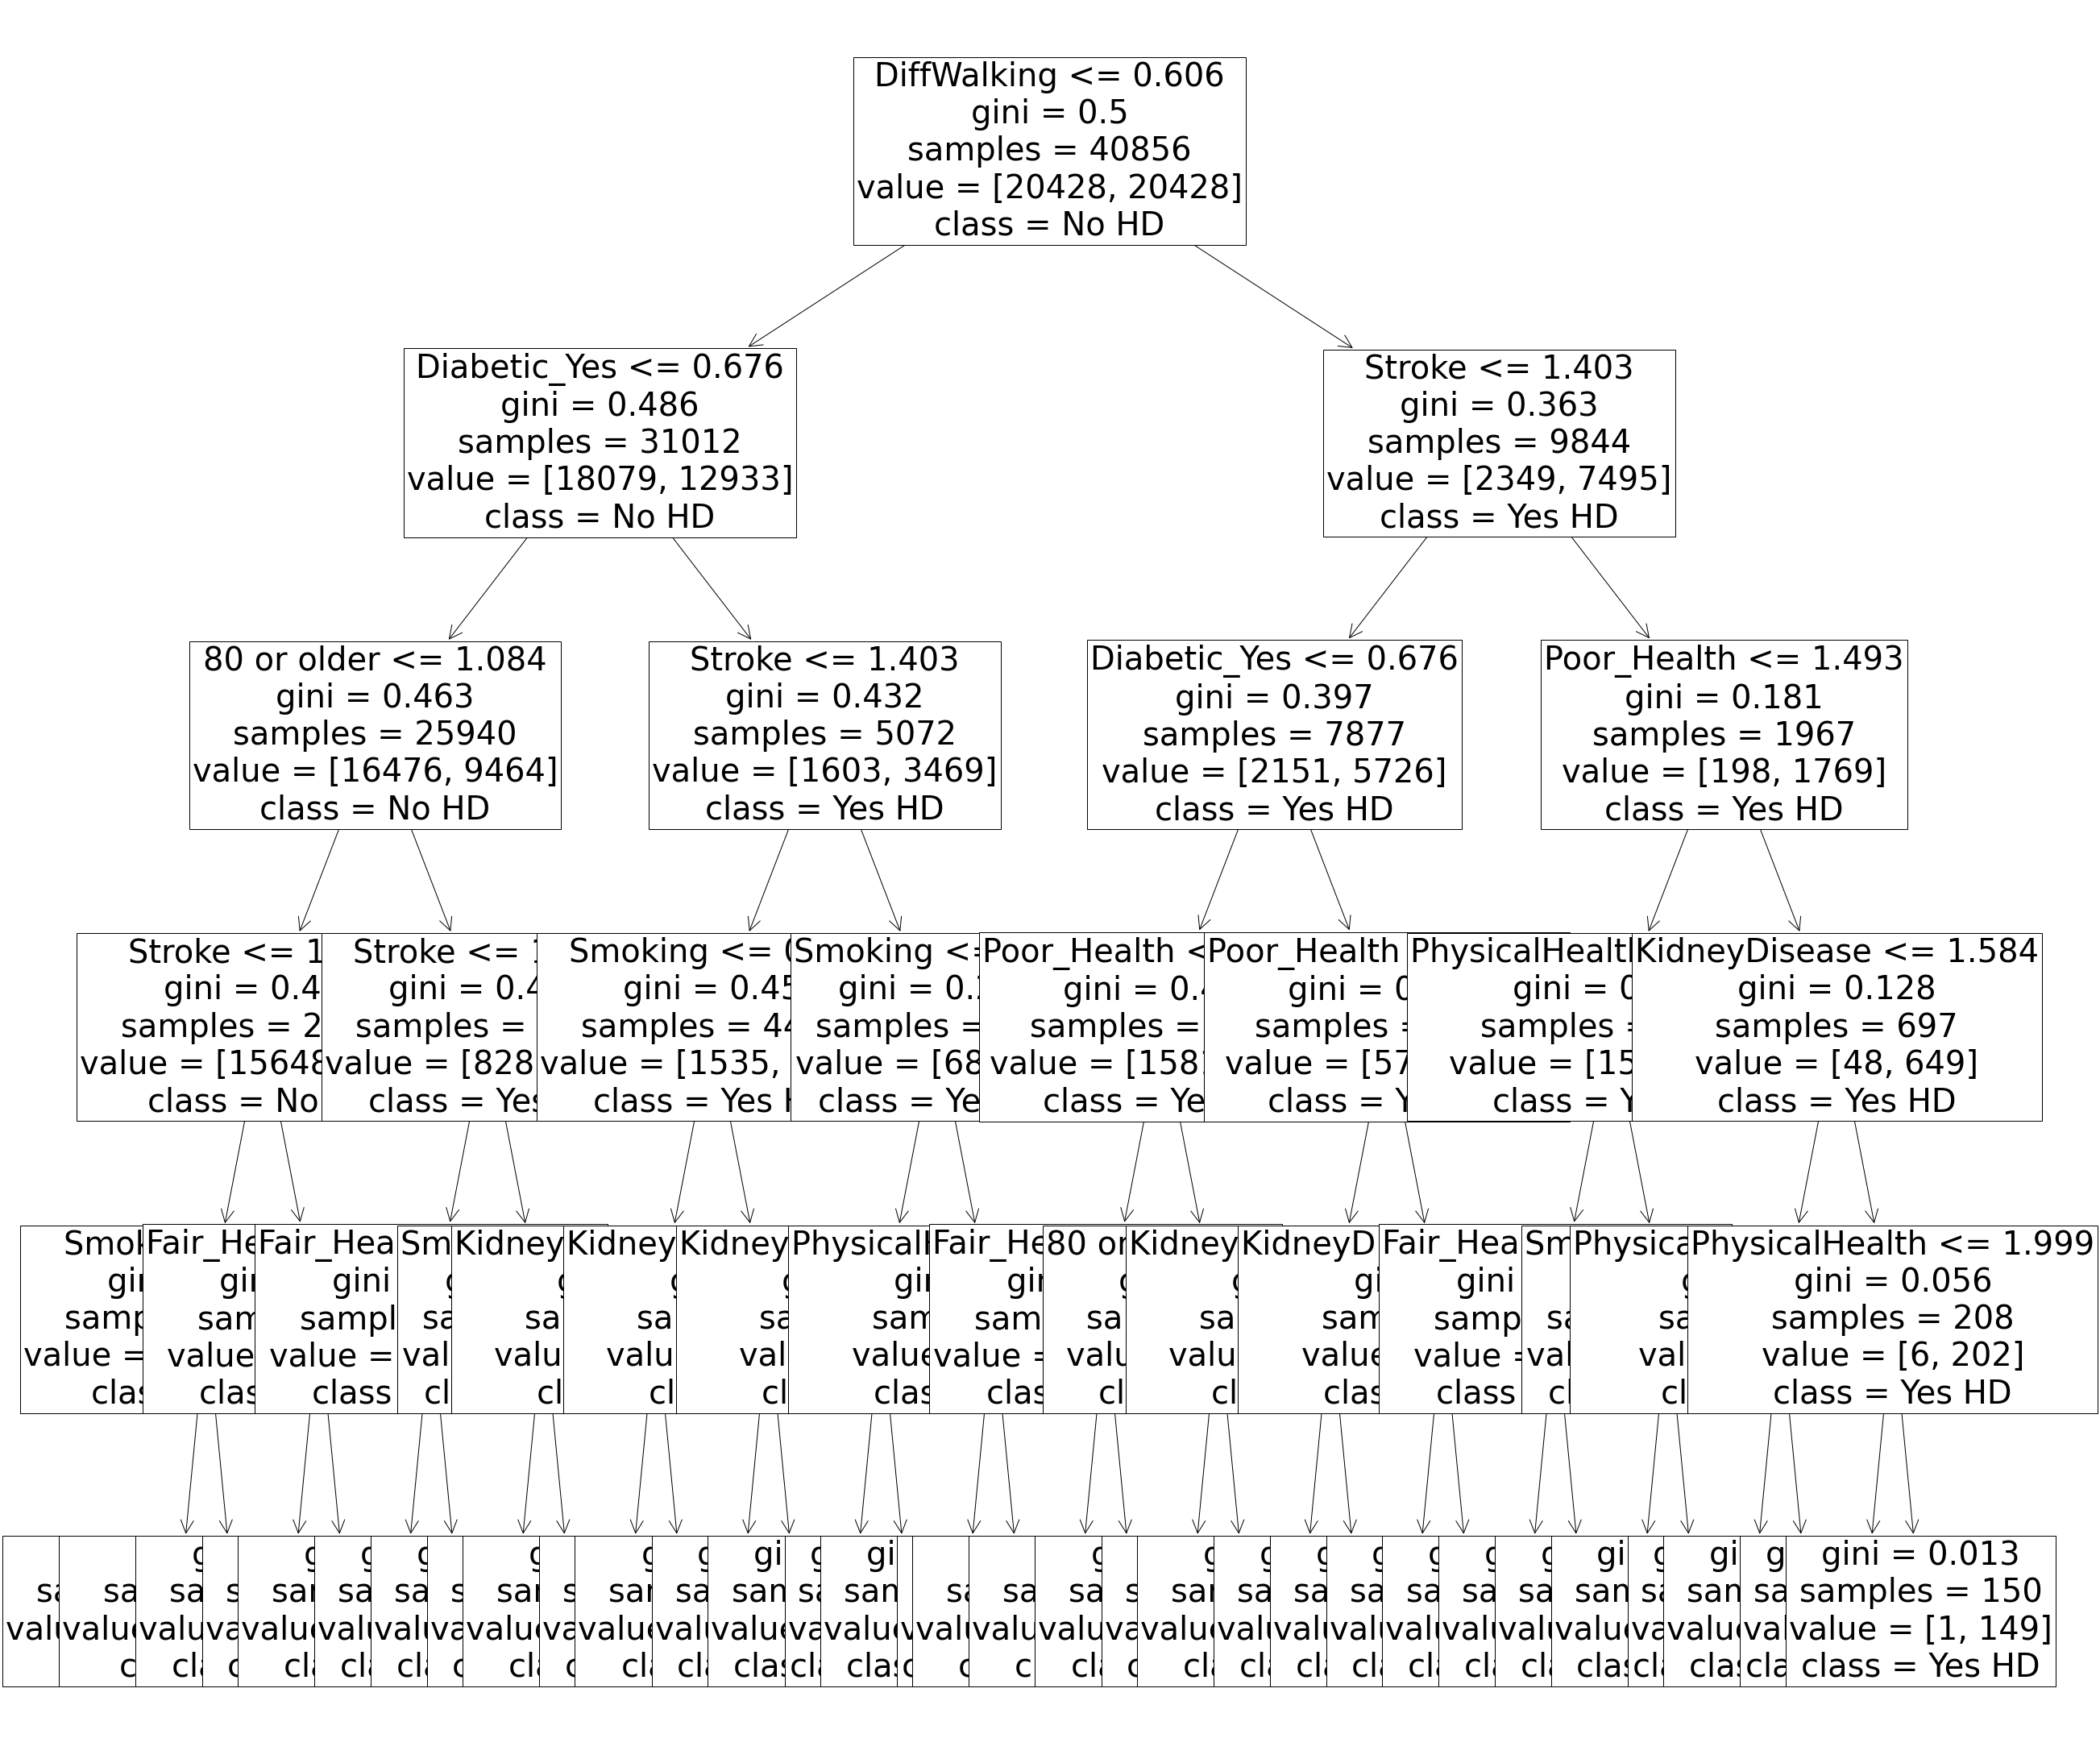

In [7]:
# Decision Tree
dec_tree = tree.DecisionTreeClassifier(max_depth=5)
dec_tree.fit(X_train, y_train)
dec_tree_score = dec_tree.score(X_test, y_test)

print(f"Decision Tree Mean Accuracy: {dec_tree_score}")
# Plotting the tree
plt.figure(figsize=(40,40))
tree.plot_tree(dec_tree, fontsize=40, feature_names=keepThese, class_names=['No HD', 'Yes HD'])

In [8]:
# Ensemble Methods
ensemble = [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
ensemble_names = ['AdaBoost', 'RandomForest', 'GradientBoosting']
for i in range(len(ensemble)):
    method = ensemble[i]
    method.fit(X_train, y_train)
    accuracy = method.score(X_test, y_test)
    print(f"{ensemble_names[i]} Accuracy: {accuracy}")

AdaBoost Accuracy: 0.7837746563434189
RandomForest Accuracy: 0.7539806626724537
GradientBoosting Accuracy: 0.7569575604447836
